# Import bibliotek

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.cm as cm
import pandas_profiling
import plotly
from sklearn.ensemble import IsolationForest
import scipy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Wczytanie danych

In [12]:
dane = pd.read_csv('../dane/dane.csv', sep=',')
dane.head()

,city,date,year,month,day,high_temp,avg_temp,low_temp,high_dewpt,avg_dewpt,...,high_wind,avg_wind,max_wind_gust,precip,events,Rain,Fog,Thunderstorm,Snow,Hail
0,Auckland,2016-01-01,2016,1,1,20.00,18.33,16.67,17.78,15.56,...,33.80,24.14,45.06,0.001,Rain,1.0,0.0,0.0,0.0,0.0
1,Auckland,2016-01-02,2016,1,2,20.00,18.89,17.78,17.78,17.22,...,53.11,33.80,74.03,0.001,Rain,1.0,0.0,0.0,0.0,0.0
2,Auckland,2016-01-03,2016,1,3,25.00,22.22,18.89,21.11,19.44,...,28.97,19.31,0.00,0.001,Rain,1.0,0.0,0.0,0.0,0.0
3,Auckland,2016-01-04,2016,1,4,22.78,18.89,15.56,18.89,15.56,...,24.14,16.09,0.00,0.001,Rain,1.0,0.0,0.0,0.0,0.0
4,Auckland,2016-01-05,2016,1,5,20.56,16.67,12.78,12.78,11.11,...,20.92,11.27,0.00,0.000,No event,0.0,0.0,0.0,0.0,0.0


# Testowanie normalności

In [46]:
#!pip install --user rpy2

scipy.stats.shapiro(dane.iloc[:,5:24])
#dane.iloc[:,5:24].dtypes

C:\ProgramData\anakio\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning:

p-value may not be accurate for N > 5000.



(0.4925263524055481, 0.0)

Poniżej jeszcze wyniki testów wykonanych za pomocą funkcji mvn z pakietu MVN środowiska R:

multivariateNormality    
             Test        Statistic p value Result    
1 Mardia Skewness 240247.282856884       0     NO    
2 Mardia Kurtosis 684.105585224257       0     NO    
3             MVN             <NA>    <NA>     NO       
4 Henze-Zirkler 4.397801       0  NO    
5 Doornik-Hansen 39436.25 38       0  NO    



univariateNormality    
           Test      Variable Statistic   p value Normality    
1  Shapiro-Wilk   high_temp      0.9526  <0.001      NO    
2  Shapiro-Wilk   avg_temp       0.9355  <0.001      NO    
3  Shapiro-Wilk   low_temp       0.9348  <0.001      NO    
4  Shapiro-Wilk  high_dewpt      0.9270  <0.001      NO    
5  Shapiro-Wilk   avg_dewpt      0.9277  <0.001      NO    
6  Shapiro-Wilk   low_dewpt      0.9358  <0.001      NO    
7  Shapiro-Wilk high_humidity    0.8881  <0.001      NO    
8  Shapiro-Wilk avg_humidity     0.9525  <0.001      NO    
9  Shapiro-Wilk low_humidity     0.9588  <0.001      NO    
10 Shapiro-Wilk    high_hg       0.9826  <0.001      NO    
11 Shapiro-Wilk    avg_hg        0.9908  <0.001      NO    
12 Shapiro-Wilk    low_hg        0.9954  <0.001      NO    
13 Shapiro-Wilk   high_vis       0.8732  <0.001      NO    
14 Shapiro-Wilk    avg_vis       0.9165  <0.001      NO    
15 Shapiro-Wilk    low_vis       0.8733  <0.001      NO    
16 Shapiro-Wilk   high_wind      0.7971  <0.001      NO    
17 Shapiro-Wilk   avg_wind       0.8941  <0.001      NO    
18 Shapiro-Wilk max_wind_gust    0.8779  <0.001      NO    
19 Shapiro-Wilk    precip        0.1758  <0.001      NO    

# Usuwanie obserwacji odstających

## Inicjalizacja klasy i dopasowanie algorytmu

In [15]:
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(dane.iloc[:,5:24])

C:\ProgramData\anakio\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning:

behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.



IsolationForest(behaviour='old', bootstrap=False, contamination=0.12,
        max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
        random_state=42, verbose=0)

In [20]:
pred = clf.predict(dane.iloc[:,5:24])
dane['anomaly']=pred
outliers=dane.loc[dane['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(dane['anomaly'].value_counts())

C:\ProgramData\anakio\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning:

threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.



 1    3216
-1     439
Name: anomaly, dtype: int64


C:\ProgramData\anakio\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\ProgramData\anakio\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



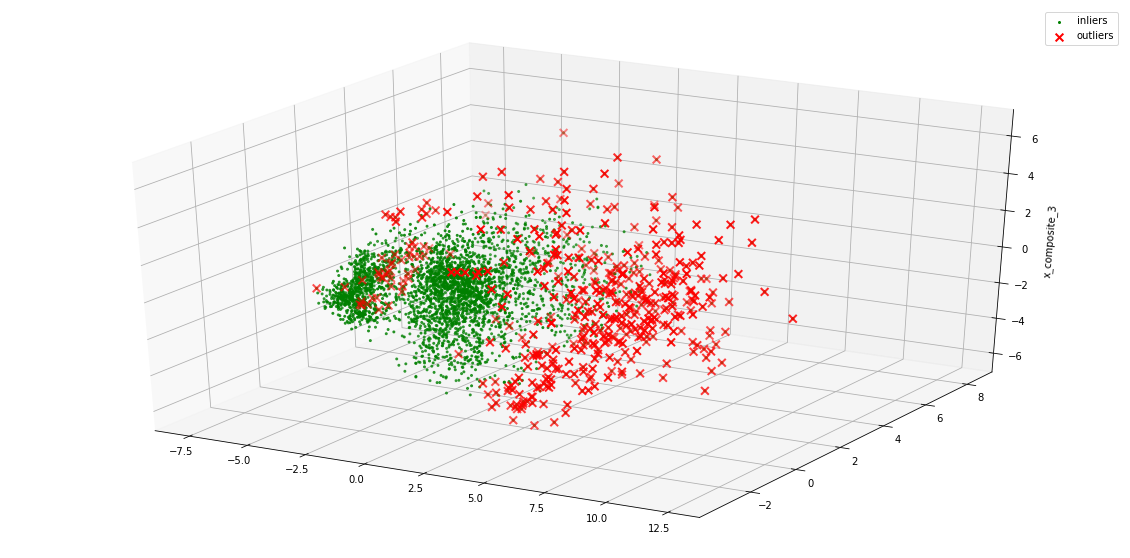

In [47]:
plt.rcParams['figure.figsize'] = (20,10)

pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(dane.iloc[:,5:24])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()
